In [1]:
import numpy as np
from scipy import integrate

R=8.314     # gas constant in J K^-1 mol^-1

Theta_D=309 # Debye Temperature of copper in K

T = 90     # given K at which we want molar heat capacity

def fn_I(x):
    fn_I= x**4 * np.exp(x) / (np.exp(x)-1)**2
    return fn_I

# For fine-tuning the integration settings see the scipy documenation  
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html

Integral=integrate.quadrature(fn_I, 0.0, Theta_D/T) 

print("The value of the integral is: ",Integral[0], " with a numerical error of ", Integral[1])

CV=9*R*(T/Theta_D)**3*Integral[0]

print("Heat capacity of Cu at T = 103 K is: ",CV, " J mol^-1 K^-1")

The value of the integral is:  7.9788851408858035  with a numerical error of  6.324787538147802e-08
Heat capacity of Cu at T = 103 K is:  14.751861725666032  J mol^-1 K^-1


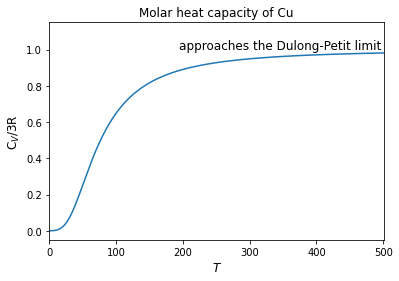

In [2]:
import matplotlib.pyplot as plt

#=== x-values
x_min=1
x_max=500
x_grids=501
x=np.linspace(x_min, x_max, x_grids)

#=== f(x) values
Cv=np.zeros(501)
for i in range(501):
    T=x[i]
    Integral=integrate.quadrature(fn_I, 0.0, Theta_D/T) 
    Cv[i]=9*R*(T/Theta_D)**3*Integral[0]

#=== plot
plt.plot(x,Cv/(3*R))
plt.title('Molar heat capacity of Cu', fontsize=12)
plt.xlim(0,501)
plt.ylim(-0.05,1.15)
plt.xlabel("$T$", fontsize=12)
plt.ylabel("C$_V$/3R", fontsize=12)
plt.text(195,1.0, 'approaches the Dulong-Petit limit', fontsize=12)
plt.savefig('heatcapacity.png') 
plt.show()